In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
edges_to_add = None

In [5]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/cora_gcn_model.pth"
list_save_path = "../attacks/cora_gcn_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.759
Initial Loss: 1.91191828250885


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.20)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

In [11]:
# splits = [0.0, 0.5, 0.7, 0.9]
# # splits = [0.9]
# split_dic_acc = defaultdict(list)
# split_dic_loss = defaultdict(list)
# itrs_one = defaultdict(int)

In [12]:
# for s in splits:
#     if s == 0.0:
#         split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_greedy(data, train, model, s, edges_to_add, constant_fn, device, is_reversed=True, verbose=True)

In [13]:
# record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.NONE, Reverse.REVERSED)
# record1.save(f'data_collection/{"greedy"}_{"gcn"}_{"cora"}_{"constant"}_{"reversed"}_results.pkl')

In [14]:
# plot_results(split_dic_acc, ptb_rate, "Greedy", "", "constant", "accuracy", "reversed")

In [15]:
# plot_results(split_dic_loss, ptb_rate, "Greedy", "", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
# split_dic_decreasing_acc = defaultdict(list)
# itrs_two = defaultdict(int)
# split_dic_decreasing_loss = defaultdict(list)

In [17]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_greedy(data, train, model, s, edges_to_add, increasing_fn, device, is_reversed=True, verbose=True)

In [18]:
# record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.NONE, Reverse.REVERSED)
# record1.save(f'data_collection/{"greedy"}_{"gcn"}_{"cora"}_{"increasing"}_{"reversed"}_results.pkl')

In [19]:
# plot_results(split_dic_decreasing_acc, ptb_rate, "Greedy", "", "increasing", "accuracy", "reversed")

In [20]:
# plot_results(split_dic_decreasing_loss, ptb_rate, "Greedy", "", "increasing", "loss", "reversed")

# regular, secondary attack, not reversed

In [11]:
# splits = [0.0, 0.5, 0.7, 0.9]
splits = [0.0, 0.5]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_greedy(data, train, model, s, edges_to_add, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/263 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
Attempt: 20, Selected: 10
Attempt: 21, Selected: 10
Attempt: 48, Selected: 20
Attempt: 76, Selected: 30
Attempt: 77, Selected: 30
Attempt: 97, Selected: 40
Attempt: 126, Selected: 50
Attempt: 127, Selected: 50
Attempt: 128, Selected: 50
Attempt: 129, Selected: 50
Attempt: 130, Selected: 50
Attempt: 131, Selected: 50
Attempt: 132, Selected: 50
Attempt: 133, Selected: 50
Attempt: 190, Selected: 60
Attempt: 191, Selected: 60
Attempt: 192, Selected: 60
Attempt: 193, Selected: 60
Attempt: 194, Selected: 60
Attempt: 195, Selected: 60
Attempt: 196, Selected: 60
Attempt: 197, Selected: 60
Attempt: 198, Selected: 60
Attempt: 199, Selected: 60
Attempt: 200, Selected: 60
Attempt: 258, Selected: 70
Attempt: 259, Selected: 70
Attempt: 260, Selected: 70
Attempt: 375, Selected: 80
Attempt: 412, Selected: 90
Attempt: 413, Selected: 90
Attempt: 414, Selected: 90
Attempt: 415, Selected

Peturbing graph...:   0%|          | 0/274 [00:00<?, ?it/s]

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.NONE, Reverse.ATTACKED)
record1.save(f'data_collection/{"greedy"}_{"gcn"}_{"cora"}_{"constant"}_{"attacked"}_results.pkl')

In [14]:
split_dic_loss

defaultdict(list,
            {0.0: [1.9119181632995605,
              1.9083542823791504,
              1.9038686752319336,
              1.9007160663604736,
              1.9062360525131226,
              1.906135082244873,
              1.9022992849349976,
              1.9014642238616943,
              1.901516318321228,
              1.9025148153305054,
              1.9016053676605225,
              1.9033308029174805,
              1.9045623540878296,
              1.9045507907867432,
              1.9045507907867432,
              1.904544472694397,
              1.9045445919036865,
              1.9037288427352905,
              1.9099253416061401,
              1.9105550050735474,
              1.9105377197265625,
              1.9105315208435059,
              1.9133480787277222,
              1.9072593450546265,
              1.907219409942627,
              1.906935214996338,
              1.906935214996338,
              1.9058259725570679,
              1.905824899673462

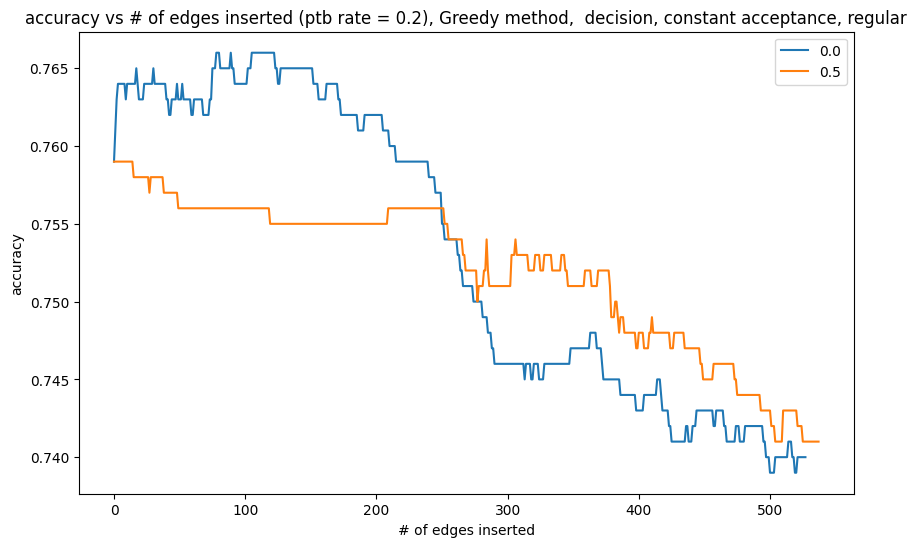

In [15]:
plot_results(split_dic_acc, ptb_rate, "Greedy", "", "constant", "accuracy", "regular")

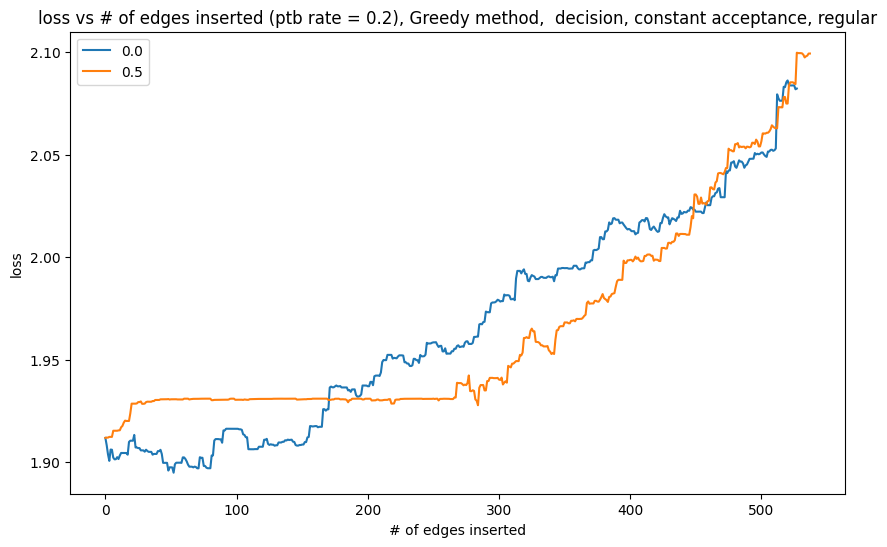

In [16]:
plot_results(split_dic_loss, ptb_rate, "Greedy", "", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [17]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [18]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_greedy(data, train, model, s, edges_to_add, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/263 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
Attempt: 5, Selected: 0
Attempt: 53, Selected: 10
Attempt: 84, Selected: 20
Attempt: 85, Selected: 20
Attempt: 86, Selected: 20
Attempt: 87, Selected: 20
Attempt: 107, Selected: 30
Attempt: 149, Selected: 40
Attempt: 190, Selected: 50
Attempt: 191, Selected: 50
Attempt: 192, Selected: 50
Attempt: 193, Selected: 50
Attempt: 194, Selected: 50
Attempt: 195, Selected: 50
Attempt: 196, Selected: 50
Attempt: 197, Selected: 50
Attempt: 198, Selected: 50
Attempt: 199, Selected: 50
Attempt: 230, Selected: 60
Attempt: 261, Selected: 70
Attempt: 262, Selected: 70
Attempt: 263, Selected: 70
Attempt: 293, Selected: 80
Attempt: 294, Selected: 80
Attempt: 295, Selected: 80
Attempt: 340, Selected: 90
Attempt: 375, Selected: 100
Attempt: 408, Selected: 110
Attempt: 409, Selected: 110
Attempt: 449, Selected: 120
Attempt: 450, Selected: 120
Attempt: 451, Selected: 120
Attempt: 452, Sele

Peturbing graph...:   0%|          | 0/273 [00:00<?, ?it/s]

In [19]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.NONE, Reverse.ATTACKED)
record1.save(f'data_collection/{"greedy"}_{"gcn"}_{"cora"}_{"increasing"}_{"attacked"}_results.pkl')

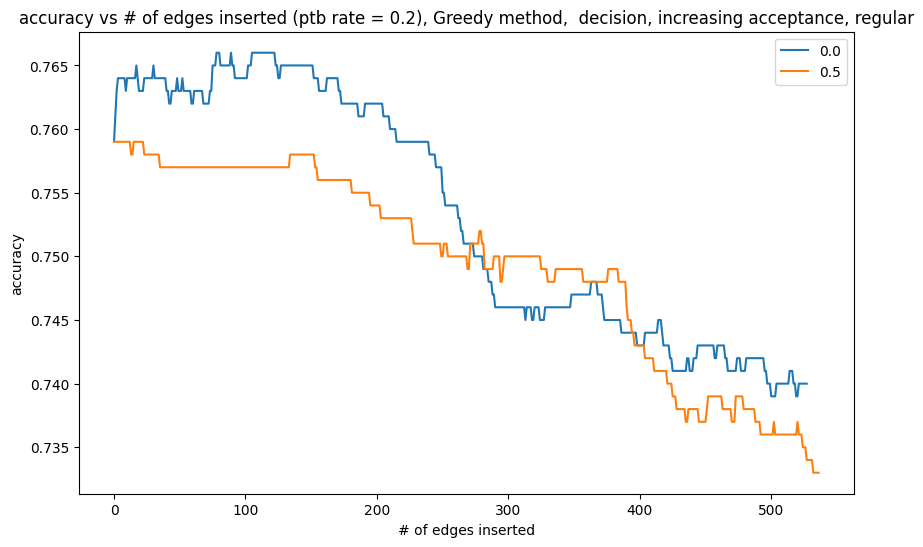

In [20]:
plot_results(split_dic_decreasing_acc, ptb_rate, "Greedy", "", "increasing", "accuracy", "regular")

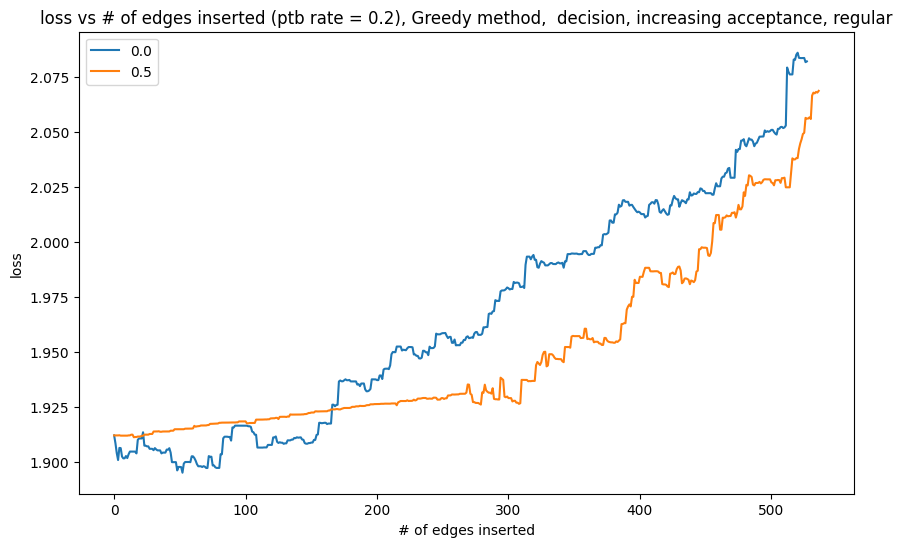

In [21]:
plot_results(split_dic_decreasing_loss, ptb_rate, "Greedy", "", "increasing", "loss", "regular")